In [60]:
%run ./loadBestPretrainedWalkingModel.ipynb

./dataFix.ipynb:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  {
./dataFix.ipynb:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  {


Dimension of walking test_x  =  (134, 27)
Dimension of walking train_x =  (536, 27)
Instructions for updating:
Please set fix_global_step_increment_bug=True and update training steps in your pipeline. See pydoc for details.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_session_config': None, '_model_dir': '/DNNNew/DNNHappy/wideAndDeep/happy_wideMotionBodyAngDeep_ConfidenceSoftplus2Layer10_10UnitsDropout01EarlyStopLR001', '_task_type': None, '_is_chief': True, '_master': '', '_save_summary_steps': 100, '_save_checkpoints_secs': 1, '_keep_checkpoint_max': 5, '_evaluation_master': '', '_tf_random_seed': None, '_num_ps_replicas': 0, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000017A0B0041D0>, '_num_worker_replicas': 0, '_task_id': 0, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_environment': 'local'}


In [61]:
# predictions = regressor.predict_scores(input_fn=get_input_fn(X_test_all_wts, y_test, LABEL, num_epochs=1, shuffle=False))
# y_predicted = list(itertools.islice(predictions,y_test[LABEL].size))

predictions = regressor.predict_scores(input_fn=get_input_fn(X_train_all_wts, y_train, LABEL, num_epochs=1, shuffle=False))
y_predicted = list(itertools.islice(predictions,y_train[LABEL].size))

INFO:tensorflow:Restoring parameters from /DNNNew/DNNHappy/wideAndDeep/happy_wideMotionBodyAngDeep_ConfidenceSoftplus2Layer10_10UnitsDropout01EarlyStopLR001\model.ckpt-2050


In [62]:
test_sample_id = 276
y_predicted[test_sample_id]
#find((X_train_all_wts["id"] == 388)==True)

31.200186

In [58]:
#y_test["happier_mu"].iloc[test_sample_id]

In [46]:
# test_feature_vals = X_test_all[FEATURESALL].iloc[test_sample_id] # later want to choose a random test sample id and its parmas..
# PARAM_ID = 6;
# PARAM_NAME = FEATURES[PARAM_ID];
# param_range = np.arange(X_train_all[PARAM_NAME].min(),X_train_all[PARAM_NAME].max(),0.1)

test_feature_vals = X_train_all[FEATURESALL].iloc[test_sample_id] # later want to choose a random test sample id and its parmas..
PARAM_ID = 9;
PARAM_NAME = FEATURES[PARAM_ID];
param_range = np.arange(X_train_all[PARAM_NAME].min(),X_train_all[PARAM_NAME].max(),0.1)

In [47]:
PARAM_NAME

'gaitDuration'

In [20]:
min(X_test_all[PARAM_NAME].min(), X_train_all[PARAM_NAME].min())

-3.5000730113550071

In [48]:
ffp_type = test_feature_vals["FFPType"].astype(np.int64)
wt_vals = np.array([1,1,1]); # wts
for s in param_range:
    if(s==X_train_all[PARAM_NAME].min()): 
        test_vals = np.copy(test_feature_vals.values)
        test_vals = np.append(test_vals, wt_vals)
        test_vals[PARAM_ID] = s;
        X_param_test = test_vals
    else:
        test_vals2 = np.copy(test_feature_vals.values)
        test_vals2 = np.append(test_vals2, wt_vals)
        test_vals2[PARAM_ID] = s;
        X_param_test = np.append(X_param_test, test_vals2,axis=0)
X_param_test = X_param_test.reshape(param_range.size,len(FEATURESALL_WTS))
X_param_test_df = pd.DataFrame(X_param_test, columns = FEATURESALL_WTS)
X_param_test_df["FFPType"]=X_param_test_df["FFPType"].astype(np.int64) 

In [49]:
def get_input_fn_predict(data_x,data_y, LABEL, num_epochs=None, shuffle=True):
  return tf.estimator.inputs.pandas_input_fn(
      x=pd.DataFrame({k: data_x[k].values for k in FEATURESALL_WTS}),
      num_epochs=num_epochs,
      shuffle=shuffle)

In [50]:
predictions_param_range = regressor.predict_scores(input_fn=get_input_fn_predict(X_param_test_df, y_test, LABEL, num_epochs=1, shuffle=False))
y_predicted_param = list(itertools.islice(predictions_param_range,X_param_test_df["FFPType"].size))

INFO:tensorflow:Restoring parameters from /DNNNew/DNNHappy/wideAndDeep/happy_wideMotionBodyAngDeep_ConfidenceSoftplus2Layer10_10UnitsDropout01EarlyStopLR001\model.ckpt-2050


In [51]:
test_feature_vals

bodyAngleZ        -0.012280
frontKneesAngle    0.332087
rearKneesAngle     1.033558
frontAnkle        -0.468105
rearAnkle         -0.472252
frontHipsAngle     0.067614
rearHipsAngle      0.164385
swingFtHeight     -1.295688
speed             -0.266237
gaitDuration      -0.438315
FFPType            1.000000
Name: 119, dtype: float64

In [52]:
param_range

array([-1.41922008, -1.31922008, -1.21922008, -1.11922008, -1.01922008,
       -0.91922008, -0.81922008, -0.71922008, -0.61922008, -0.51922008,
       -0.41922008, -0.31922008, -0.21922008, -0.11922008, -0.01922008,
        0.08077992,  0.18077992,  0.28077992,  0.38077992,  0.48077992,
        0.58077992,  0.68077992,  0.78077992,  0.88077992,  0.98077992,
        1.08077992,  1.18077992,  1.28077992,  1.38077992,  1.48077992,
        1.58077992,  1.68077992,  1.78077992,  1.88077992,  1.98077992,
        2.08077992])

In [53]:
X_param_test_df

bodyAngleZ  frontKneesAngle  rearKneesAngle  frontAnkle  rearAnkle  \
0     -0.01228         0.332087        1.033558   -0.468105  -0.472252   
1     -0.01228         0.332087        1.033558   -0.468105  -0.472252   
2     -0.01228         0.332087        1.033558   -0.468105  -0.472252   
3     -0.01228         0.332087        1.033558   -0.468105  -0.472252   
4     -0.01228         0.332087        1.033558   -0.468105  -0.472252   
5     -0.01228         0.332087        1.033558   -0.468105  -0.472252   
6     -0.01228         0.332087        1.033558   -0.468105  -0.472252   
7     -0.01228         0.332087        1.033558   -0.468105  -0.472252   
8     -0.01228         0.332087        1.033558   -0.468105  -0.472252   
9     -0.01228         0.332087        1.033558   -0.468105  -0.472252   
10    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
11    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
12    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
13    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
14    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
15    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
16    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
17    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
18    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
19    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
20    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
21    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
22    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
23    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
24    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
25    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
26    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
27    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
28    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
29    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
30    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
31    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
32    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
33    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
34    -0.01228         0.332087        1.033558   -0.468105  -0.472252   
35    -0.01228         0.332087        1.033558   -0.468105  -0.472252   

    frontHipsAngle  rearHipsAngle  swingFtHeight     speed  gaitDuration  \
0         0.067614       0.164385      -1.295688 -0.266237      -1.41922   
1         0.067614       0.164385      -1.295688 -0.266237      -1.31922   
2         0.067614       0.164385      -1.295688 -0.266237      -1.21922   
3         0.067614       0.164385      -1.295688 -0.266237      -1.11922   
4         0.067614       0.164385      -1.295688 -0.266237      -1.01922   
5         0.067614       0.164385      -1.295688 -0.266237      -0.91922   
6         0.067614       0.164385      -1.295688 -0.266237      -0.81922   
7         0.067614       0.164385      -1.295688 -0.266237      -0.71922   
8         0.067614       0.164385      -1.295688 -0.266237      -0.61922   
9         0.067614       0.164385      -1.295688 -0.266237      -0.51922   
10        0.067614       0.164385      -1.295688 -0.266237      -0.41922   
11        0.067614       0.164385      -1.295688 -0.266237      -0.31922   
12        0.067614       0.164385      -1.295688 -0.266237      -0.21922   
13        0.067614       0.164385      -1.295688 -0.266237      -0.11922   
14        0.067614       0.164385      -1.295688 -0.266237      -0.01922   
15        0.067614       0.164385      -1.295688 

In [54]:
y_predicted_param

[33.841949,
 33.559017,
 33.279312,
 33.002773,
 32.729355,
 32.459007,
 32.191677,
 31.92732,
 31.665878,
 31.407309,
 31.151567,
 30.898607,
 30.648376,
 30.400841,
 30.155956,
 29.913679,
 29.673969,
 29.436792,
 29.202118,
 28.969896,
 28.740107,
 28.512711,
 28.287682,
 28.064987,
 27.844597,
 27.626488,
 27.410627,
 27.196993,
 26.985558,
 26.776302,
 26.569197,
 26.364214,
 26.161339,
 25.960545,
 25.761805,
 25.565105]

Populating the interactive namespace from numpy and matplotlib


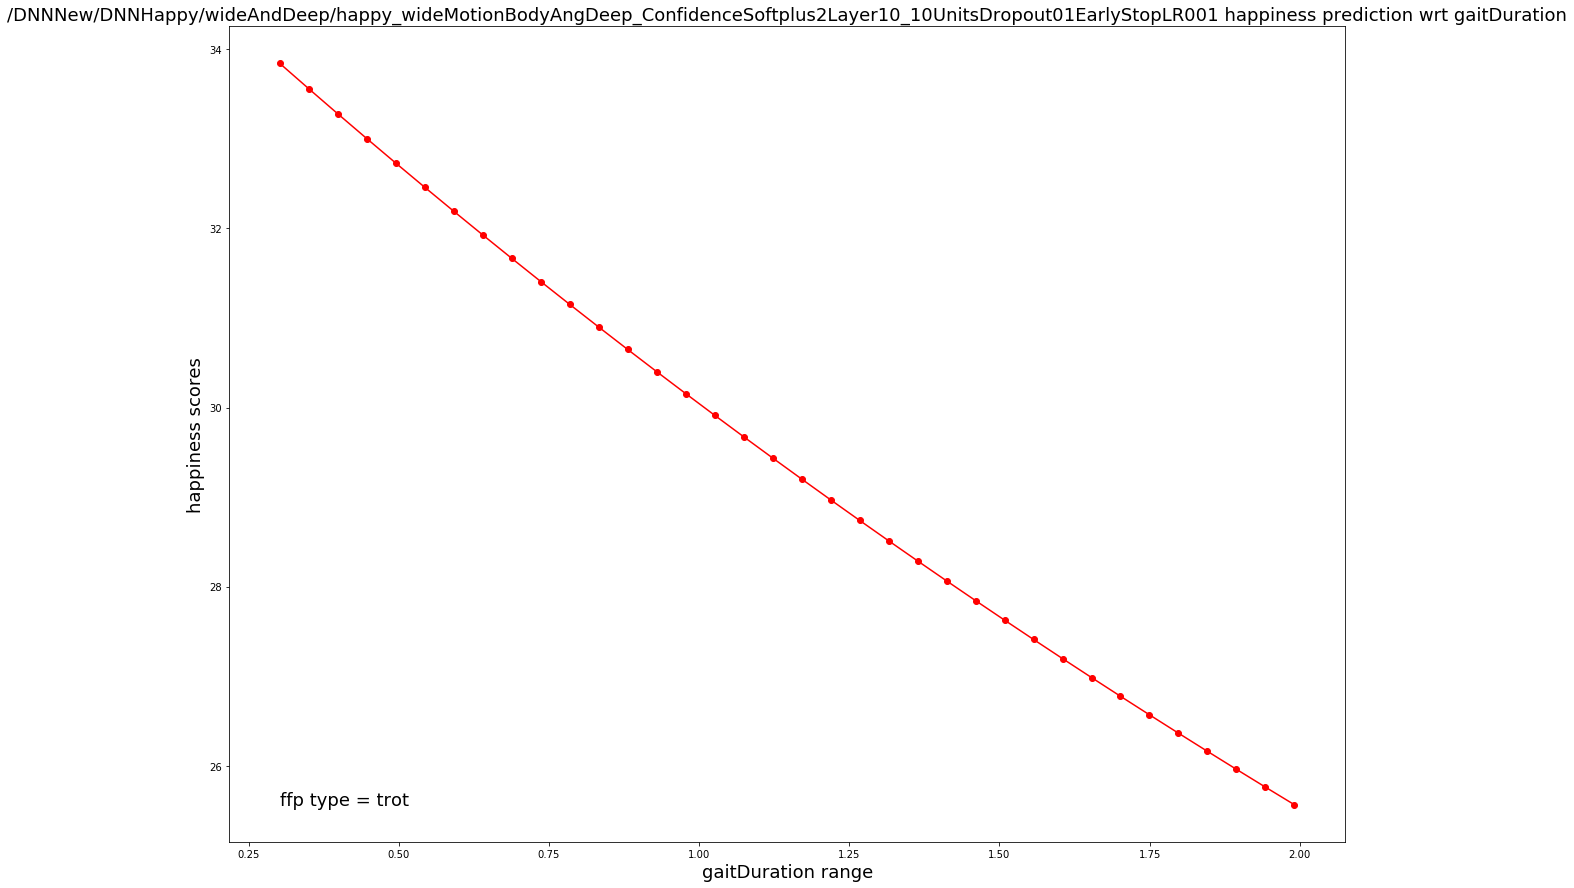

In [56]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)
ax =plt.figure()
x = param_range*X_train[PARAM_NAME].std() + X_train[PARAM_NAME].mean()#param_range
plt.errorbar(x,y_predicted_param,yerr=0,fmt='r-o',label="predicted")
plt.title(model_dir_name +' happiness prediction wrt '+ PARAM_NAME,fontsize=18)
plt.xlabel(PARAM_NAME +' range',fontsize=18)
plt.ylabel('happiness scores',fontsize=18)
#plt.text(X_train_all[PARAM_NAME].min(),min(y_predicted_param), 'ffp type = '+FFP_LABELS[ffp_type], fontsize=18)
plt.text(X_train_all[PARAM_NAME].min()*X_train[PARAM_NAME].std() + X_train[PARAM_NAME].mean(),min(y_predicted_param), 'ffp type = '+FFP_LABELS[ffp_type], fontsize=18)
plt.show()
fig_name = model_dir_name + "/happinessVs"+ PARAM_NAME+"Curve_"+ FFP_LABELS[ffp_type] +"FFP.pdf"
#ax.savefig(fig_name) 

In [57]:
X_param_test_df.shape

(36, 14)

In [15]:
# save_name = model_dir_name + "/happy_"+ PARAM_NAME+"_"+ str(ffp_type) +"FFP.txt" 
# x_scaled = param_range#*X_train[PARAM_NAME].std() + X_train[PARAM_NAME].mean()
# count = 0
# f = open(save_name, 'w')
# for d in y_predicted_param:
#     f.write('%lf %lf\n' % (x_scaled[count], d))
#     count = count+1
# f.close()

# mean_features = abs(X_test_all[FEATURES].mean()*0.0);
# PARAM_ID = 10;
# PARAM_NAME = FEATURESALL[PARAM_ID];
# param_range = np.arange(X_train_all[PARAM_NAME].min(),X_train_all[PARAM_NAME].max()+1,1)

# wt_vals = np.array([1,1,1]); # wts
# for s in param_range:
#     if(s==X_train_all[PARAM_NAME].min()): 
#         mean_vals = np.copy(mean_features.values)
#         mean_vals = np.append(mean_vals, s) # ffp
#         mean_vals = np.append(mean_vals, wt_vals)
#         X_param_test = mean_vals
#     else:
#         mean_vals2 = np.copy(mean_features.values)
#         mean_vals2 = np.append(mean_vals2, s)
#         mean_vals2 = np.append(mean_vals2, wt_vals)
#         X_param_test = np.append(X_param_test, mean_vals2,axis=0)
# X_param_test = X_param_test.reshape(param_range.size,len(FEATURESALL_WTS))
# X_param_test_df = pd.DataFrame(X_param_test, columns = FEATURESALL_WTS)
# X_param_test_df["FFPType"] =X_param_test_df["FFPType"].astype(int64) # fixing dtype for int variable..

# predictions_param_range = regressor.predict_scores(input_fn=get_input_fn_predict(X_param_test_df, y_test, LABEL, num_epochs=1, shuffle=False))
# y_predicted_param = list(itertools.islice(predictions_param_range,X_param_test_df["FFPType"].size))

# %pylab inline
# pylab.rcParams['figure.figsize'] = (20, 15)
# ax =plt.figure()
# x = param_range
# plt.errorbar(x,y_predicted_param,yerr=0,fmt='r-o',label="predicted")
# plt.title(model_dir_name +' happiness prediction wrt '+ PARAM_NAME,fontsize=18)
# plt.xlabel(PARAM_NAME +' range',fontsize=18)
# plt.ylabel('happiness scores',fontsize=18)
# #plt.text(X_train_all[PARAM_NAME].min(),min(y_predicted_param), 'ffp type = '+FFP_LABELS[ffp_type], fontsize=18)
# #plt.text(X_train_all[PARAM_NAME].min()*X_train[PARAM_NAME].std() + X_train[PARAM_NAME].mean(),min(y_predicted_param), 'ffp type = '+FFP_LABELS[ffp_type], fontsize=18)
# plt.show()
# fig_name = model_dir_name + "/happinessVs"+ PARAM_NAME+"Curve_"+ FFP_LABELS[ffp_type] +"FFP.pdf"
# #ax.savefig(fig_name) 